In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<p style="text-align: center; font-size: 28px; font-weight: bold;">
  Sports & Outdoors
</p>


In [9]:
# --- STEP 1: Load & Clean Data ---
file_name = '../data/sports_outdoor.csv'
df = pd.read_csv(file_name)

print(f"Original Data Size: {df.shape}")

# 1. Remove 'Category' and 'Rating' Columns if they exist
cols_to_drop = ['Category', 'Rating']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# 2. Price Cleaning (Remove currency symbols like $, US, £, and commas)
# 'coerce' turns invalid parsing into NaN
df['Price'] = df['Price'].astype(str).str.replace('US', '').str.replace('$', '').str.replace(',', '').str.replace('£', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# 3. Reviews Cleaning (Extract digits only)
df['Reviews'] = df['Reviews'].astype(str).str.extract(r'(\d+)').astype(float).fillna(0)

# 4. Remove Empty Rows (Drop rows where Price is missing)
df.dropna(subset=['Price'], inplace=True)

# 5. Feature Engineering (Create 2 New Columns)
# Feature A: Price Segment (Budget vs Premium)
def categorize_price(p):
    if p < 50: return 'Low Budget'
    elif p < 150: return 'Mid Range'
    else: return 'Premium'

df['Price_Segment'] = df['Price'].apply(categorize_price)

# Feature B: Estimated Revenue (Price * Review Count)
df['Est_Revenue'] = df['Price'] * df['Reviews']

# --- SAVE BACK TO SAME FILE (Overwrite) ---
df.to_csv(file_name, index=False)
print(f"Success! '{file_name}' has been updated with cleaned data.")
print(f"New Data Size: {df.shape}")
print("-" * 30)

Original Data Size: (40, 6)
Success! '../data/sports_outdoor.csv' has been updated with cleaned data.
New Data Size: (39, 6)
------------------------------


In [11]:
df.head(10)

,Product Name,Price,Reviews,Product URL,Price_Segment,Est_Revenue
1,IPRee WVC-300/600/700W Wifi Version Solar On G...,81.02,1.0,https://www.banggood.com/IPRee-WVC-300-or-600-...,Mid Range,81.02
2,ANGWATT Speed Throttle For ANGWATT X1 ANGWATT ...,10.61,11.0,https://www.banggood.com/ANGWATT-Speed-Throttl...,Low Budget,116.71
3,ANGWATT Round Brake Pad For ANGWATT CS1 ANGWAT...,3.39,19.0,https://www.banggood.com/ANGWATT-Round-Brake-P...,Low Budget,64.41
4,TENGOO Electric Heated Scarf Neck USB Charging...,14.31,2.0,https://www.banggood.com/TENGOO-Electric-Heate...,Low Budget,28.62
5,1000W Solar Panel 12V Solar Cell 20A Controlle...,23.90,0.0,https://www.banggood.com/1000W-Solar-Panel-12V...,Low Budget,0.00
6,TENGOO HD-30 Heating Underwear Pant Set Therma...,56.51,0.0,https://www.banggood.com/TENGOO-HD-30-Heating-...,Mid Range,0.00
7,ROCKBROS Magnetic Bicycle Taillight Smart Brak...,10.06,5.0,https://www.banggood.com/ROCKBROS-Magnetic-Bic...,Low Budget,50.30
8,Bike Bell 130dB High Sound Bicycle Horn IPX6 W...,12.38,0.0,https://www.banggood.com/Bike-Bell-130dB-High-...,Low Budget,0.00
9,ANGWATT NFC Card For ANGWATT Instrument Suitab...,4.24,12.0,https://www.banggood.com/ANGWATT-NFC-Card-For-...,Low Budget,50.88
10,TENGOO Summer Water Wading Shoes Unisex Outdoo...,13.15,2.0,https://www.banggood.com/TENGOO-Summer-Water-W...,Low Budget,26.30


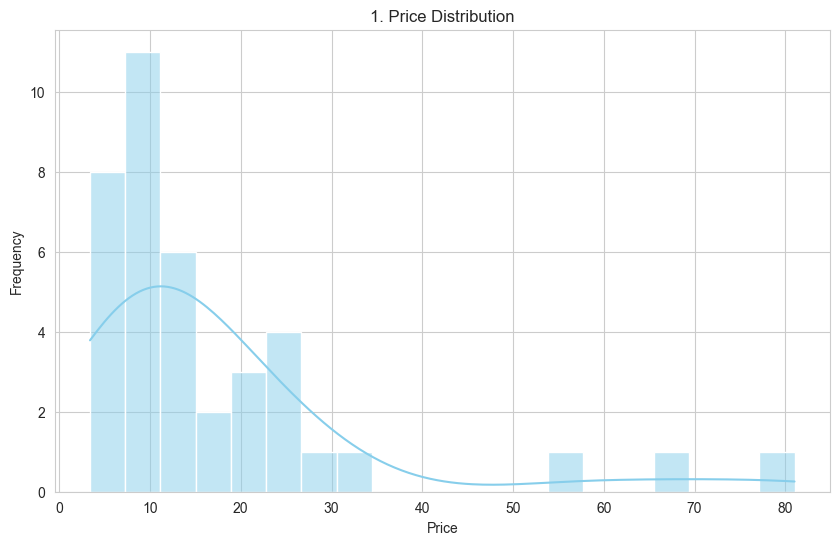

In [12]:
# --- STEP 2
sns.set_style("whitegrid")

# Graph 1: Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True, color='skyblue')
plt.title('1. Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

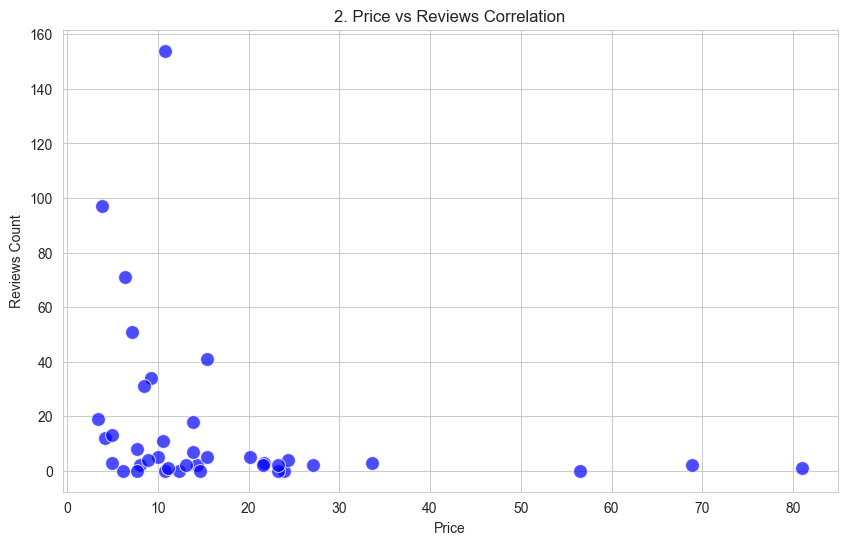

In [14]:
# Graph 2: Price vs Reviews Correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Reviews', data=df, color='blue', s=100, alpha=0.7)
plt.title('2. Price vs Reviews Correlation')
plt.xlabel('Price')
plt.ylabel('Reviews Count')
plt.show()

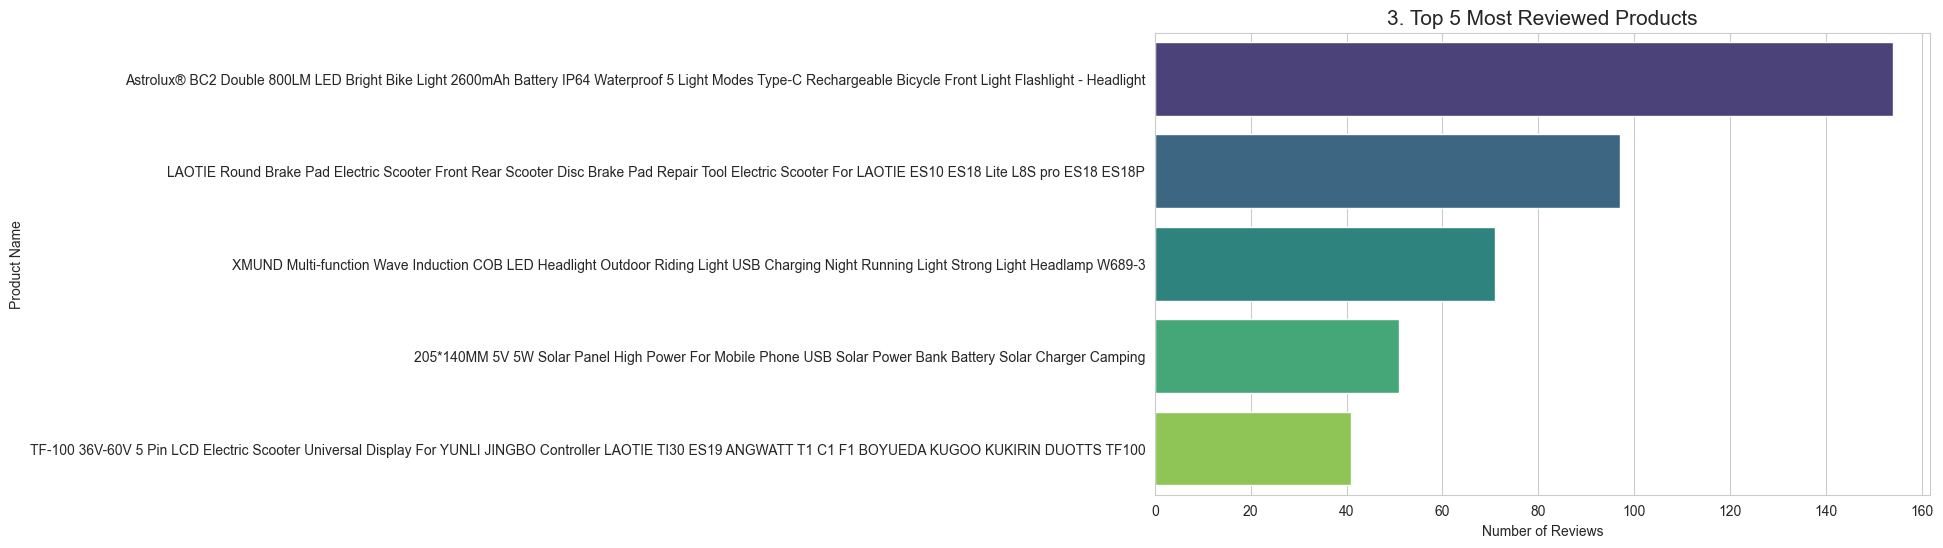

In [16]:
# Graph 3: Top 5 Most Reviewed Products
plt.figure(figsize=(10, 6))

# Get top 5 products by Review count
top_5 = df.nlargest(5, 'Reviews')

# Fix: Use 'Product Name' instead of 'Name'
sns.barplot(x='Reviews', y='Product Name', data=top_5, palette='viridis', hue='Product Name', legend=False)

plt.title('3. Top 5 Most Reviewed Products', fontsize=15)
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12028\2138724483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price_Segment', data=df, palette='pastel', order=['Low Budget', 'Mid Range', 'Premium'])


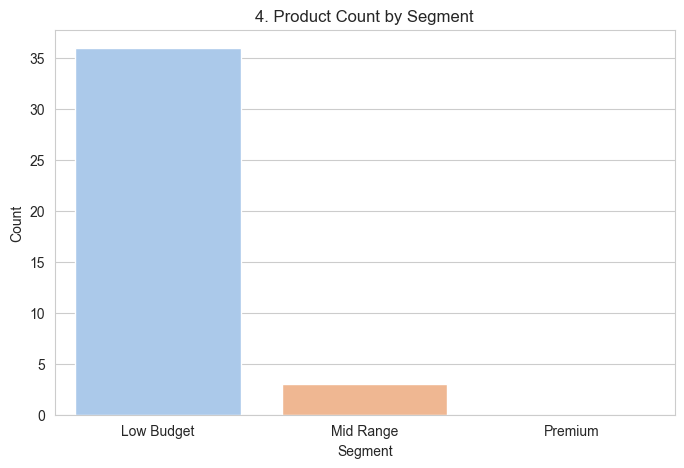

In [20]:
# Graph 4: Product Count by Price Segment
plt.figure(figsize=(8, 5))
sns.countplot(x='Price_Segment', data=df, palette='pastel', order=['Low Budget', 'Mid Range', 'Premium'])
plt.title('4. Product Count by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12028\4109388998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price_Segment', y='Est_Revenue', data=df, estimator=sum, palette='magma', errorbar=None)


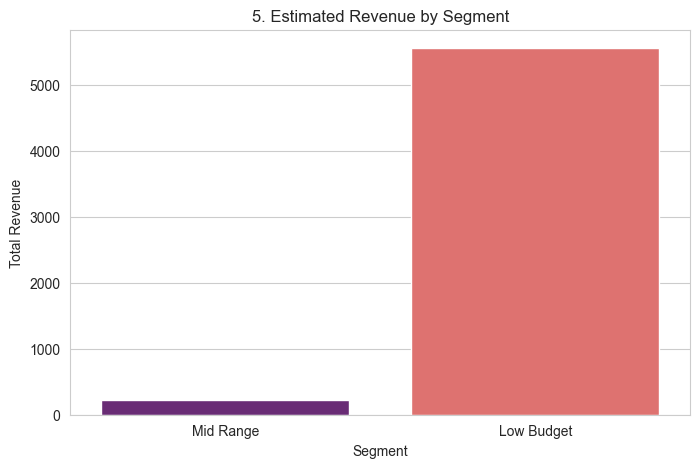

In [21]:

# Graph 5: Estimated Revenue by Segment
plt.figure(figsize=(8, 5))
sns.barplot(x='Price_Segment', y='Est_Revenue', data=df, estimator=sum, palette='magma', errorbar=None)
plt.title('5. Estimated Revenue by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Revenue')
plt.show()

<p style="text-align: center; font-size: 28px; font-weight: bold;">
  Men & Women's Clothing
</p>


In [23]:
# --- STEP 1: Load & Clean Data ---
file_name = '../data/men_women_clothing.csv'
df = pd.read_csv(file_name)

print(f"Original Data Size: {df.shape}")

# 1. Remove 'Category' and 'Rating' Columns if they exist
cols_to_drop = ['Category', 'Rating']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# 2. Price Cleaning (Remove currency symbols like $, US, £, and commas)
# 'coerce' turns invalid parsing into NaN
df['Price'] = df['Price'].astype(str).str.replace('US', '').str.replace('$', '').str.replace(',', '').str.replace('£', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# 3. Reviews Cleaning (Extract digits only)
df['Reviews'] = df['Reviews'].astype(str).str.extract(r'(\d+)').astype(float).fillna(0)

# 4. Remove Empty Rows (Drop rows where Price is missing)
df.dropna(subset=['Price'], inplace=True)

# 5. Feature Engineering (Create 2 New Columns)
# Feature A: Price Segment (Budget vs Premium)
def categorize_price(p):
    if p < 50: return 'Low Budget'
    elif p < 150: return 'Mid Range'
    else: return 'Premium'

df['Price_Segment'] = df['Price'].apply(categorize_price)

# Feature B: Estimated Revenue (Price * Review Count)
df['Est_Revenue'] = df['Price'] * df['Reviews']

# --- SAVE BACK TO SAME FILE (Overwrite) ---
df.to_csv(file_name, index=False)
print(f"Success! '{file_name}' has been updated with cleaned data.")
print(f"New Data Size: {df.shape}")
print("-" * 30)

Original Data Size: (40, 6)
Success! '../data/men_women_clothing.csv' has been updated with cleaned data.
New Data Size: (37, 6)
------------------------------


In [24]:
df.head(10)

,Product Name,Price,Reviews,Product URL,Price_Segment,Est_Revenue
1,INCERUN Mens Leopard Print Daily Pant Side Zip...,19.35,0.0,https://www.banggood.com/INCERUN-Mens-Leopard-...,Low Budget,0.00
2,INCERUN Men's Casual Overalls with Adjustable ...,28.64,0.0,https://www.banggood.com/INCERUN-Mens-Casual-O...,Low Budget,0.00
3,INCERUN Men Shirts Fashion Check Print Lace Up...,14.70,0.0,https://www.banggood.com/INCERUN-Men-Shirts-Fa...,Low Budget,0.00
4,Men's Quick Dry Cotton Linen Shorts Summer Bre...,8.51,4.0,https://www.banggood.com/Mens-Quick-Dry-Cotton...,Low Budget,34.04
5,INCERUN Men Jubba Thobe Solid Color Long Sleev...,20.89,0.0,https://www.banggood.com/INCERUN-Men-Jubba-Tho...,Low Budget,0.00
6,Mens Ethnic Geometric Funny Face Pattern Patch...,10.06,3.0,https://www.banggood.com/Mens-Ethnic-Geometric...,Low Budget,30.18
7,INCERUN Men Tank Knitted Transparent Top Sold ...,12.38,0.0,https://www.banggood.com/INCERUN-Men-Tank-Knit...,Low Budget,0.00
8,INCERUN Mens Solid Pleated Design Casual Strai...,22.44,0.0,https://www.banggood.com/INCERUN-Mens-Solid-Pl...,Low Budget,0.00
9,INCERUN Mens Contrast Color Print Half-Zip Lon...,22.44,0.0,https://www.banggood.com/INCERUN-Mens-Contrast...,Low Budget,0.00
10,6pcs Men's Ice Silk Cool Soft Seamless Comfy B...,10.06,12.0,https://www.banggood.com/6pcs-Mens-Ice-Silk-Co...,Low Budget,120.72


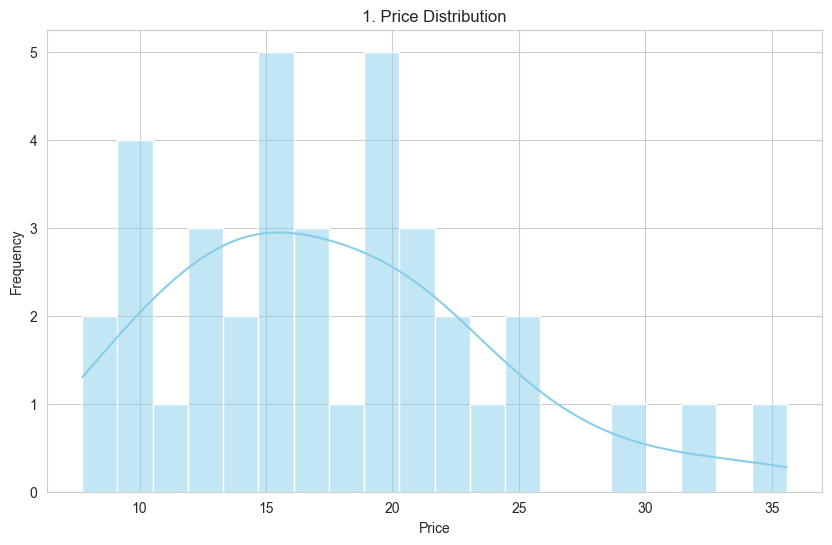

In [25]:
# --- STEP 2
sns.set_style("whitegrid")

# Graph 1: Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True, color='skyblue')
plt.title('1. Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

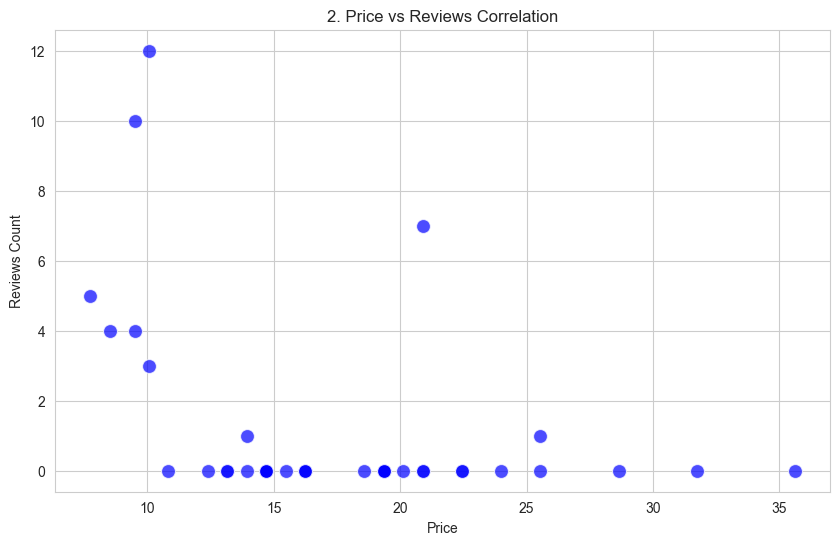

In [26]:
# Graph 2: Price vs Reviews Correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Reviews', data=df, color='blue', s=100, alpha=0.7)
plt.title('2. Price vs Reviews Correlation')
plt.xlabel('Price')
plt.ylabel('Reviews Count')
plt.show()

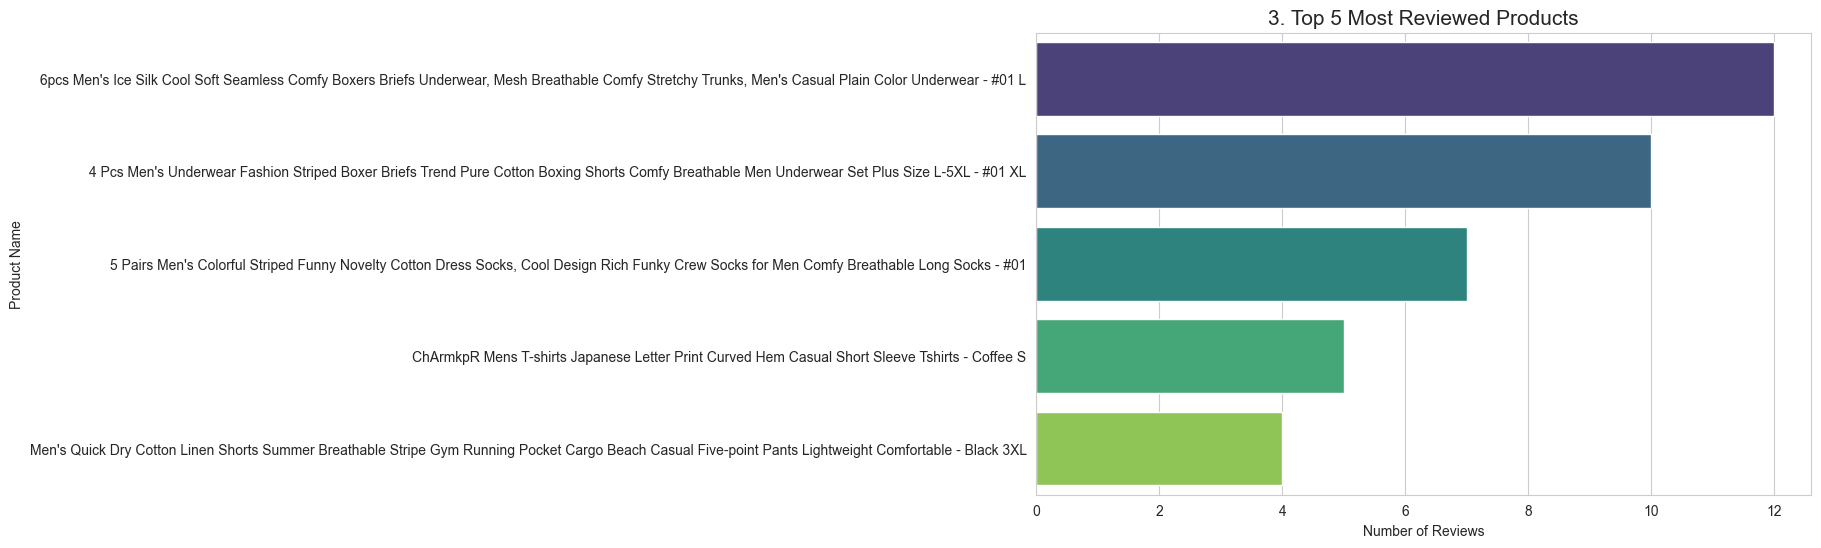

In [27]:
# Graph 3: Top 5 Most Reviewed Products
plt.figure(figsize=(10, 6))

# Get top 5 products by Review count
top_5 = df.nlargest(5, 'Reviews')

# Fix: Use 'Product Name' instead of 'Name'
sns.barplot(x='Reviews', y='Product Name', data=top_5, palette='viridis', hue='Product Name', legend=False)

plt.title('3. Top 5 Most Reviewed Products', fontsize=15)
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12028\2138724483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price_Segment', data=df, palette='pastel', order=['Low Budget', 'Mid Range', 'Premium'])


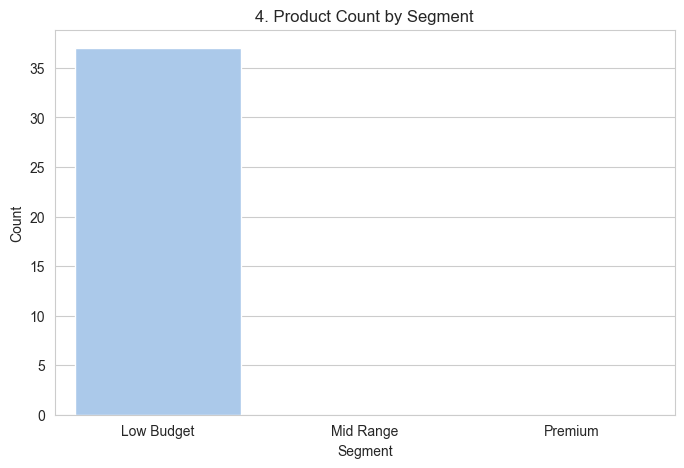

In [28]:
# Graph 4: Product Count by Price Segment
plt.figure(figsize=(8, 5))
sns.countplot(x='Price_Segment', data=df, palette='pastel', order=['Low Budget', 'Mid Range', 'Premium'])
plt.title('4. Product Count by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12028\2401424230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price_Segment', y='Est_Revenue', data=df, estimator=sum, palette='magma', errorbar=None)


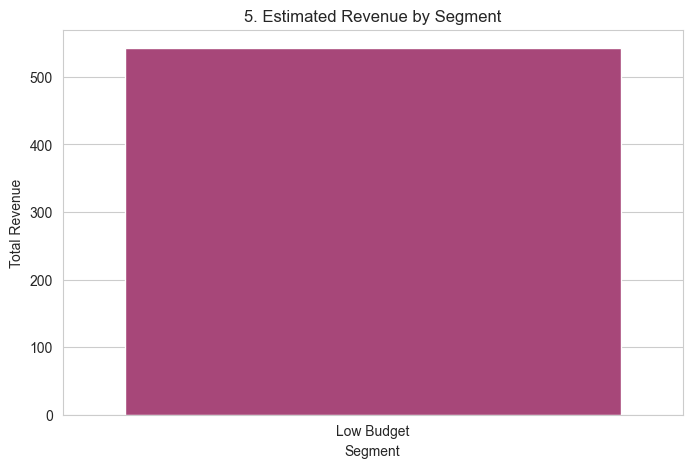

In [34]:
# Graph 5: Estimated Revenue by Segment
plt.figure(figsize=(8, 5))
sns.barplot(x='Price_Segment', y='Est_Revenue', data=df, estimator=sum, palette='magma', errorbar=None)
plt.title('5. Estimated Revenue by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Revenue')
plt.show()

<p style="text-align: center; font-size: 28px; font-weight: bold;">
  Electronics
</p>


In [41]:
# --- STEP 1: Load & Clean Data ---
file_name = '../data/computers_office.csv'
df = pd.read_csv(file_name)

print(f"Original Data Size: {df.shape}")

# 1. Remove 'Category' and 'Rating' Columns if they exist
cols_to_drop = ['Category', 'Rating']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# 2. Price Cleaning (Remove currency symbols like $, US, £, and commas)
# 'coerce' turns invalid parsing into NaN
df['Price'] = df['Price'].astype(str).str.replace('US', '').str.replace('$', '').str.replace(',', '').str.replace('£', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# 3. Reviews Cleaning (Extract digits only)
df['Reviews'] = df['Reviews'].astype(str).str.extract(r'(\d+)').astype(float).fillna(0)

# 4. Remove Empty Rows (Drop rows where Price is missing)
df.dropna(subset=['Price'], inplace=True)

# 5. Feature Engineering (Create 2 New Columns)
# Feature A: Price Segment (Budget vs Premium)
def categorize_price(p):
    if p < 50: return 'Low Budget'
    elif p < 150: return 'Mid Range'
    else: return 'Premium'

df['Price_Segment'] = df['Price'].apply(categorize_price)

# Feature B: Estimated Revenue (Price * Review Count)
df['Est_Revenue'] = df['Price'] * df['Reviews']

# --- SAVE BACK TO SAME FILE (Overwrite) ---
df.to_csv(file_name, index=False)
print(f"Success! '{file_name}' has been updated with cleaned data.")
print(f"New Data Size: {df.shape}")
print("-" * 30)

Original Data Size: (37, 6)
Success! '../data/computers_office.csv' has been updated with cleaned data.
New Data Size: (37, 6)
------------------------------


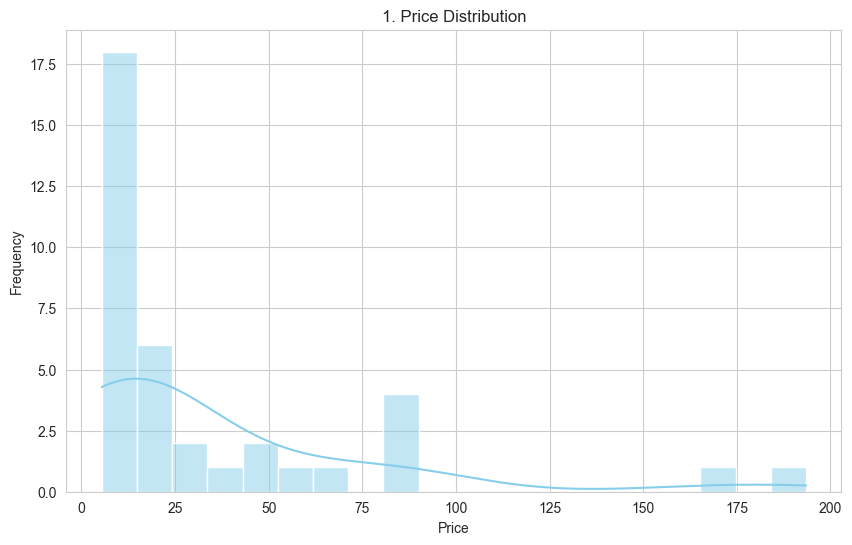

In [42]:
# --- STEP 2
sns.set_style("whitegrid")

# Graph 1: Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True, color='skyblue')
plt.title('1. Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

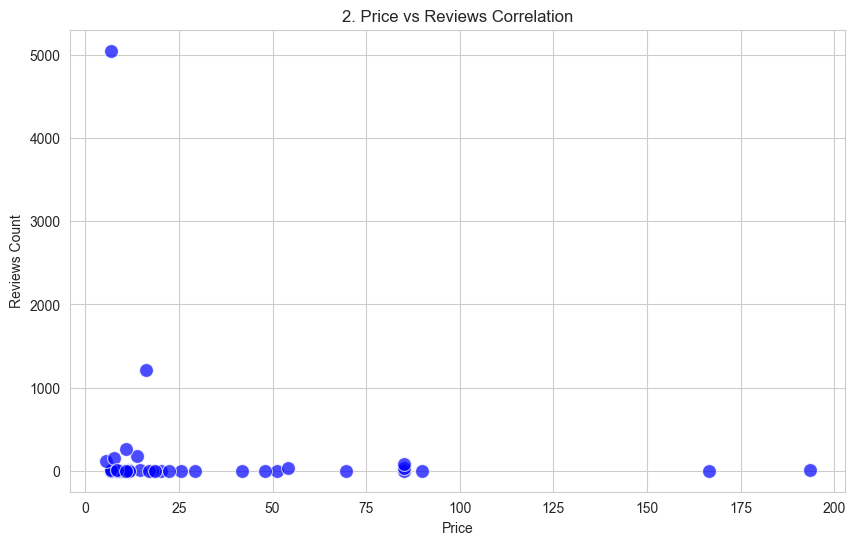

In [43]:
# Graph 2: Price vs Reviews Correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Reviews', data=df, color='blue', s=100, alpha=0.7)
plt.title('2. Price vs Reviews Correlation')
plt.xlabel('Price')
plt.ylabel('Reviews Count')
plt.show()

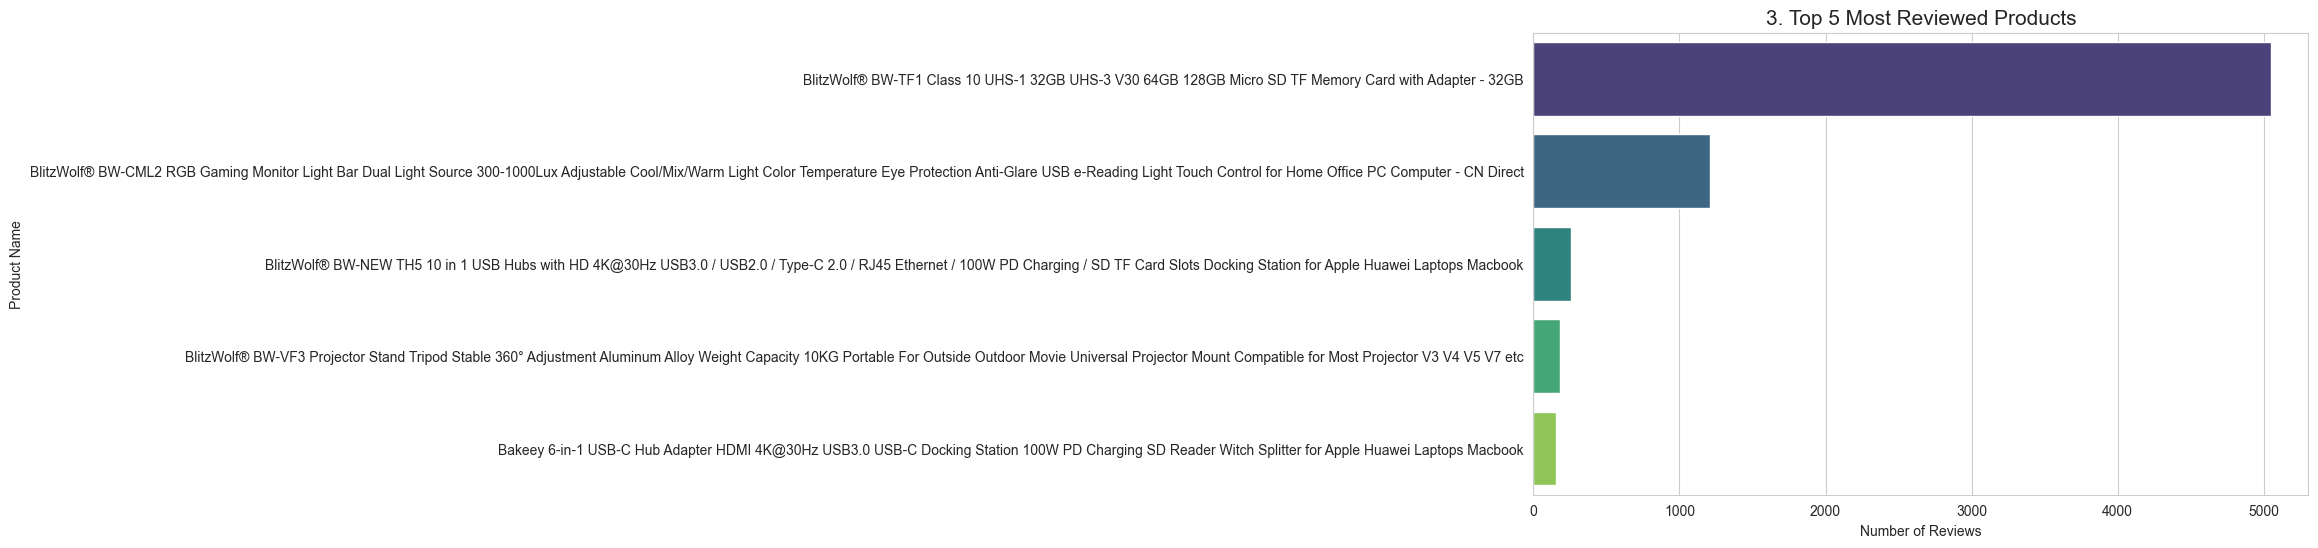

In [44]:
# Graph 3: Top 5 Most Reviewed Products
plt.figure(figsize=(10, 6))

# Get top 5 products by Review count
top_5 = df.nlargest(5, 'Reviews')

# Fix: Use 'Product Name' instead of 'Name'
sns.barplot(x='Reviews', y='Product Name', data=top_5, palette='viridis', hue='Product Name', legend=False)

plt.title('3. Top 5 Most Reviewed Products', fontsize=15)
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12028\2138724483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price_Segment', data=df, palette='pastel', order=['Low Budget', 'Mid Range', 'Premium'])


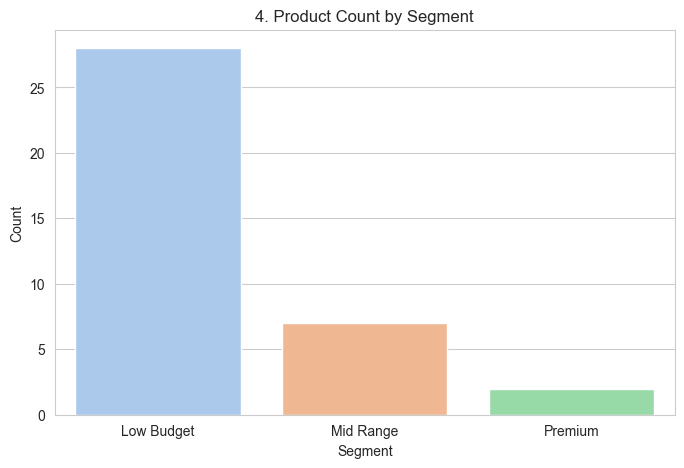

In [45]:
# Graph 4: Product Count by Price Segment
plt.figure(figsize=(8, 5))
sns.countplot(x='Price_Segment', data=df, palette='pastel', order=['Low Budget', 'Mid Range', 'Premium'])
plt.title('4. Product Count by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12028\2401424230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price_Segment', y='Est_Revenue', data=df, estimator=sum, palette='magma', errorbar=None)


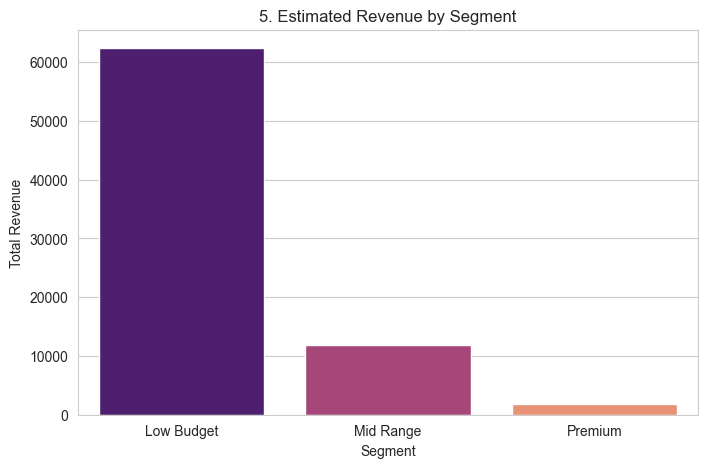

In [46]:
# Graph 5: Estimated Revenue by Segment
plt.figure(figsize=(8, 5))
sns.barplot(x='Price_Segment', y='Est_Revenue', data=df, estimator=sum, palette='magma', errorbar=None)
plt.title('5. Estimated Revenue by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Revenue')
plt.show()

<p style="text-align: center; font-size: 28px; font-weight: bold;">
    Computers Office
</p>


In [47]:
# --- STEP 1: Load & Clean Data ---
file_name = '../data/computers_office.csv'
df = pd.read_csv(file_name)

print(f"Original Data Size: {df.shape}")

# 1. Remove 'Category' and 'Rating' Columns if they exist
cols_to_drop = ['Category', 'Rating']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# 2. Price Cleaning (Remove currency symbols like $, US, £, and commas)
# 'coerce' turns invalid parsing into NaN
df['Price'] = df['Price'].astype(str).str.replace('US', '').str.replace('$', '').str.replace(',', '').str.replace('£', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# 3. Reviews Cleaning (Extract digits only)
df['Reviews'] = df['Reviews'].astype(str).str.extract(r'(\d+)').astype(float).fillna(0)

# 4. Remove Empty Rows (Drop rows where Price is missing)
df.dropna(subset=['Price'], inplace=True)

# 5. Feature Engineering (Create 2 New Columns)
# Feature A: Price Segment (Budget vs Premium)
def categorize_price(p):
    if p < 50: return 'Low Budget'
    elif p < 150: return 'Mid Range'
    else: return 'Premium'

df['Price_Segment'] = df['Price'].apply(categorize_price)

# Feature B: Estimated Revenue (Price * Review Count)
df['Est_Revenue'] = df['Price'] * df['Reviews']

# --- SAVE BACK TO SAME FILE (Overwrite) ---
df.to_csv(file_name, index=False)
print(f"Success! '{file_name}' has been updated with cleaned data.")
print(f"New Data Size: {df.shape}")
print("-" * 30)

Original Data Size: (37, 6)
Success! '../data/computers_office.csv' has been updated with cleaned data.
New Data Size: (37, 6)
------------------------------


In [48]:
df.head(10)

,Product Name,Price,Reviews,Product URL,Price_Segment,Est_Revenue
0,BlitzWolf® BW-CML2 RGB Gaming Monitor Light Ba...,16.25,1212.0,https://www.banggood.com/BlitzWolf-BW-CML2-RGB...,Low Budget,19695.00
1,Vertical Docking Station for Mac Mini M4/M4 Pr...,41.80,0.0,https://www.banggood.com/Vertical-Docking-Stat...,Low Budget,0.00
2,BlitzWolf® BW-VF3 Projector Stand Tripod Stabl...,13.93,182.0,https://www.banggood.com/BlitzWolf-BW-VF3-Proj...,Low Budget,2535.26
3,MAIWO M1 M.2 NVMe PSSD Portable Solid State Dr...,51.09,0.0,https://www.banggood.com/MAIWO-M1-M_2-NVMe-PSS...,Mid Range,0.00
4,Universal Projector Mount 360° Rotation Adjust...,9.28,0.0,https://www.banggood.com/Universal-Projector-M...,Low Budget,0.00
5,MAIWO K35274D 4 Bay RAID External Hard Drive E...,89.80,1.0,https://www.banggood.com/MAIWO-K35274D-4-Bay-R...,Mid Range,89.80
6,100/120 Inch Portable Foldable HD Projector Sc...,20.12,1.0,https://www.banggood.com/100-or-120-Inch-Porta...,Low Budget,20.12
7,WL-DS1604 16-in-1 Type-C Vertical Docking Stat...,85.15,0.0,https://www.banggood.com/WL-DS1604-16-in-1-Typ...,Mid Range,0.00
8,MADLIONS MAD68 HE Magnetic Amber Switch Mechan...,47.99,0.0,https://www.banggood.com/MADLIONS-MAD68-HE-Mag...,Low Budget,0.00
9,Lenovo ThinkPlus TPCU301plus Type-C USB3.0 Fla...,6.96,2.0,https://www.banggood.com/Lenovo-ThinkPlus-TPCU...,Low Budget,13.92


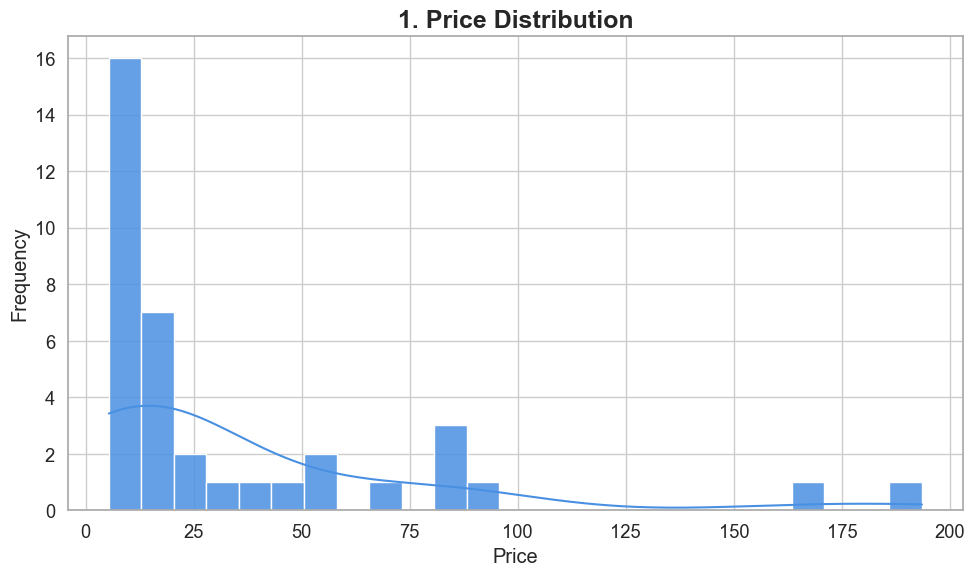

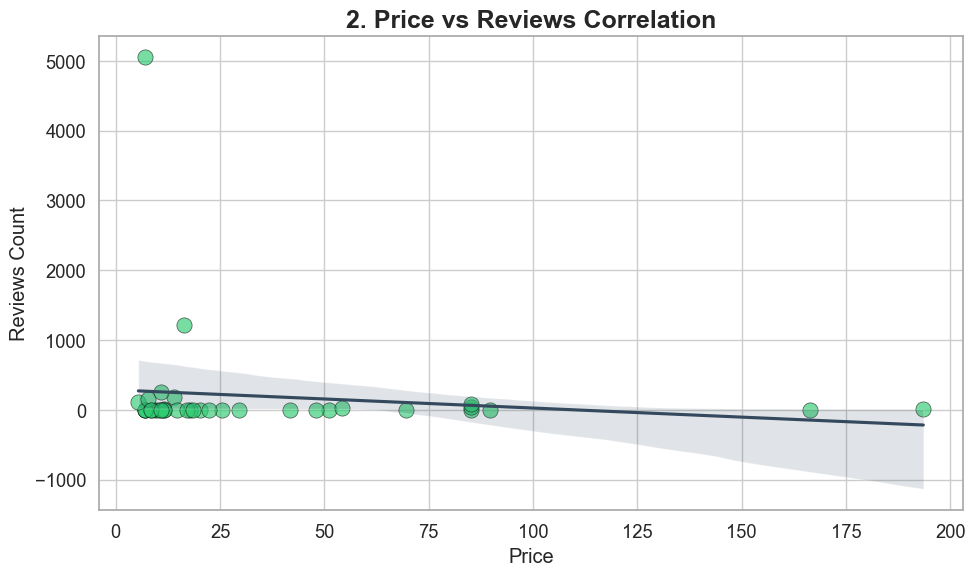

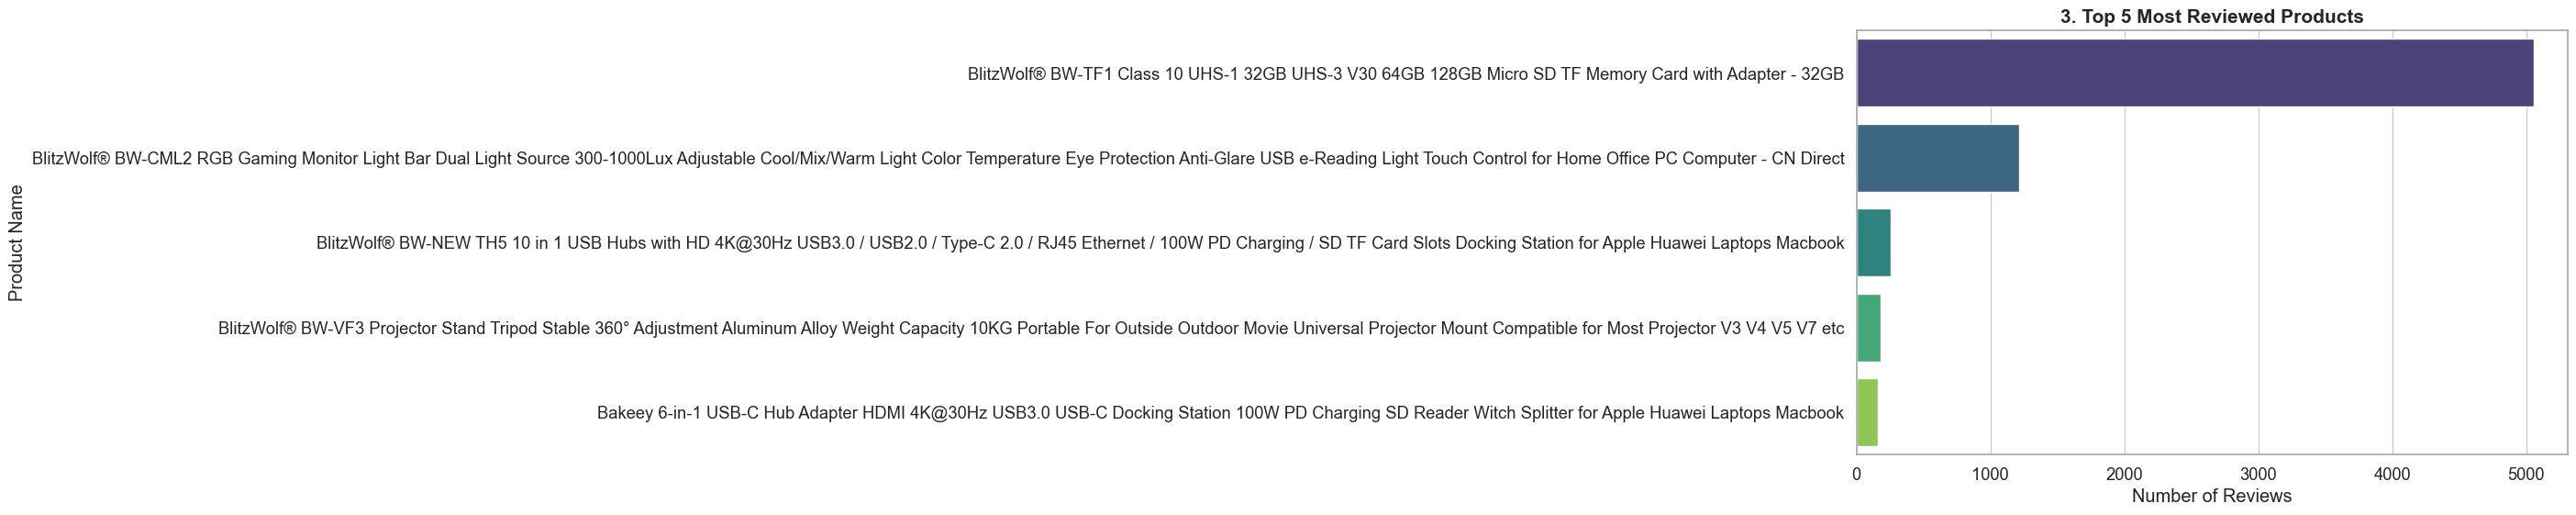

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12028\3257654309.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


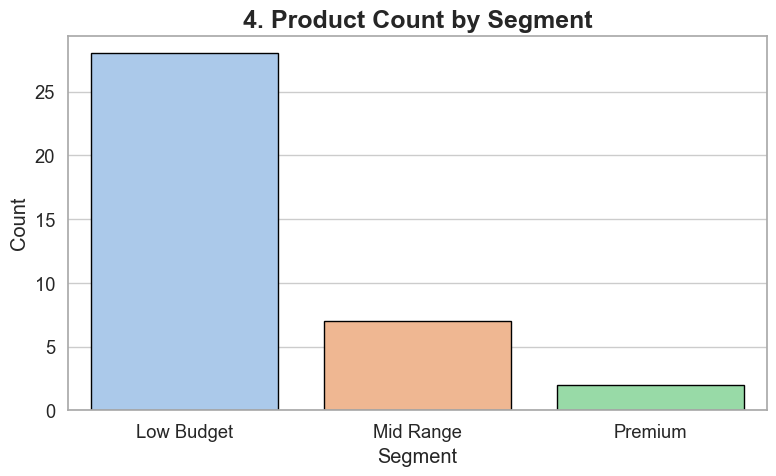

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12028\3257654309.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


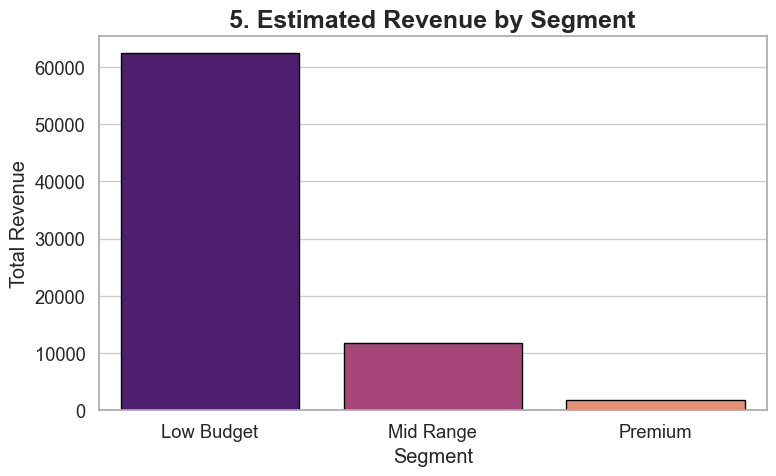

In [50]:
# --- STEP 2 (Beautiful Upgraded Version)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font_scale=1.2)

# Common figure style
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.edgecolor'] = "#aaaaaa"
plt.rcParams['axes.titleweight'] = "bold"

# -------------------------
# 1. Price Distribution
# -------------------------
plt.figure()
sns.histplot(
    df['Price'],
    bins=25,
    kde=True,
    color="#4a90e2",
    edgecolor="white",
    alpha=0.85,
    linewidth=1
)
plt.title("1. Price Distribution", fontsize=18)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# -------------------------
# 2. Price vs Reviews
# -------------------------
plt.figure()
sns.scatterplot(
    x='Price',
    y='Reviews',
    data=df,
    s=120,
    alpha=0.65,
    color="#2ecc71",
    edgecolor="black",
    linewidth=0.5
)
sns.regplot(
    x='Price',
    y='Reviews',
    data=df,
    scatter=False,
    color="#34495e"
)
plt.title("2. Price vs Reviews Correlation", fontsize=18)
plt.xlabel("Price")
plt.ylabel("Reviews Count")
plt.tight_layout()
plt.show()

# Graph 3: Top 5 Most Reviewed Products
plt.figure(figsize=(10, 6))

# Get top 5 products by Review count
top_5 = df.nlargest(5, 'Reviews')

# Fix: Use 'Product Name' instead of 'Name'
sns.barplot(x='Reviews', y='Product Name', data=top_5, palette='viridis', hue='Product Name', legend=False)

plt.title('3. Top 5 Most Reviewed Products', fontsize=15)
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()

# -------------------------
# 4. Product Count by Price Segment
# -------------------------
plt.figure(figsize=(8, 5))
sns.countplot(
    x='Price_Segment',
    data=df,
    palette="pastel",
    order=['Low Budget', 'Mid Range', 'Premium'],
    edgecolor="black"
)
plt.title("4. Product Count by Segment", fontsize=18)
plt.xlabel("Segment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# -------------------------
# 5. Estimated Revenue by Segment
# -------------------------
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Price_Segment',
    y='Est_Revenue',
    data=df,
    estimator=sum,
    palette="magma",
    edgecolor="black",
    errorbar=None
)
plt.title("5. Estimated Revenue by Segment", fontsize=18)
plt.xlabel("Segment")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


<p style="text-align: center; font-size: 28px; font-weight: bold;">
  Automobiles and Motorcycles
</p>


In [51]:
# --- STEP 1: Load & Clean Data ---
file_name = '../data/automobiles_motorcycles.csv'
df = pd.read_csv(file_name)

print(f"Original Data Size: {df.shape}")

# 1. Remove 'Category' and 'Rating' Columns if they exist
cols_to_drop = ['Category', 'Rating']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# 2. Price Cleaning (Remove currency symbols like $, US, £, and commas)
# 'coerce' turns invalid parsing into NaN
df['Price'] = df['Price'].astype(str).str.replace('US', '').str.replace('$', '').str.replace(',', '').str.replace('£', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# 3. Reviews Cleaning (Extract digits only)
df['Reviews'] = df['Reviews'].astype(str).str.extract(r'(\d+)').astype(float).fillna(0)

# 4. Remove Empty Rows (Drop rows where Price is missing)
df.dropna(subset=['Price'], inplace=True)

# 5. Feature Engineering (Create 2 New Columns)
# Feature A: Price Segment (Budget vs Premium)
def categorize_price(p):
    if p < 50: return 'Low Budget'
    elif p < 150: return 'Mid Range'
    else: return 'Premium'

df['Price_Segment'] = df['Price'].apply(categorize_price)

# Feature B: Estimated Revenue (Price * Review Count)
df['Est_Revenue'] = df['Price'] * df['Reviews']

# --- SAVE BACK TO SAME FILE (Overwrite) ---
df.to_csv(file_name, index=False)
print(f"Success! '{file_name}' has been updated with cleaned data.")
print(f"New Data Size: {df.shape}")
print("-" * 30)

Original Data Size: (40, 6)
Success! '../data/automobiles_motorcycles.csv' has been updated with cleaned data.
New Data Size: (40, 6)
------------------------------


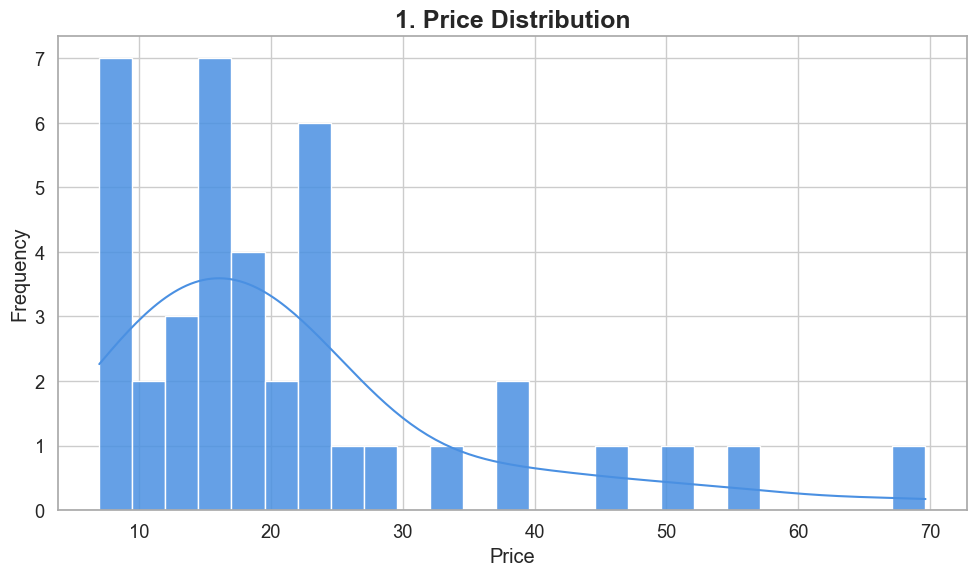

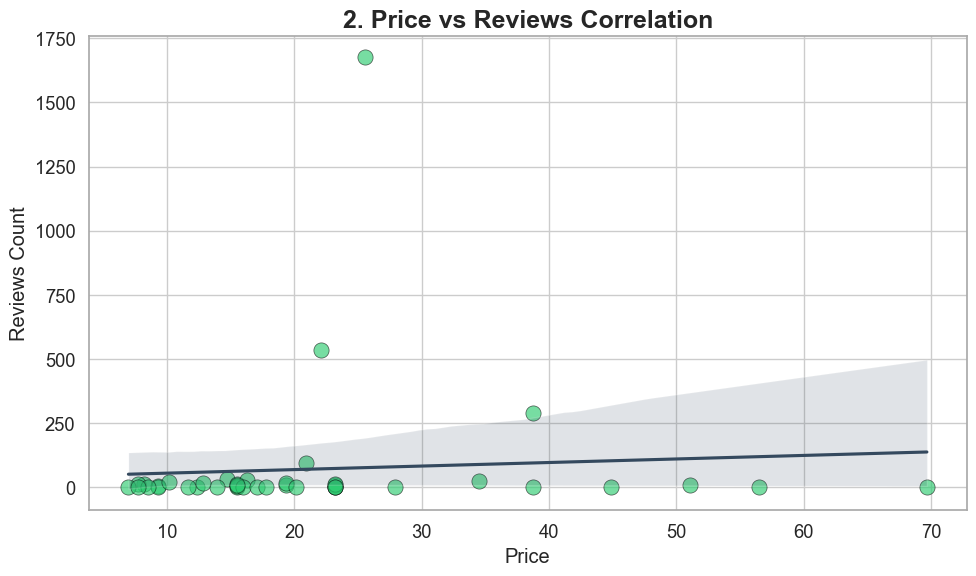

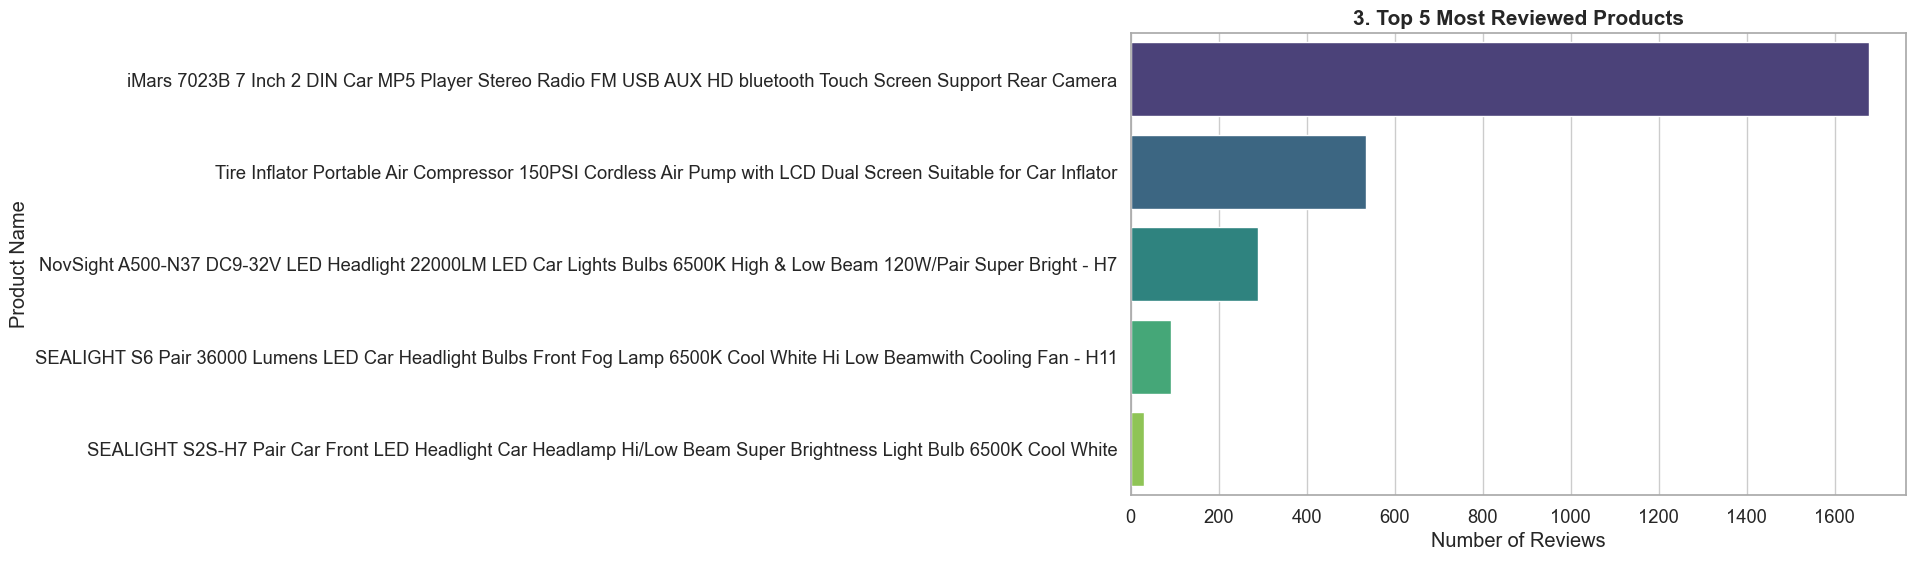

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12028\3257654309.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


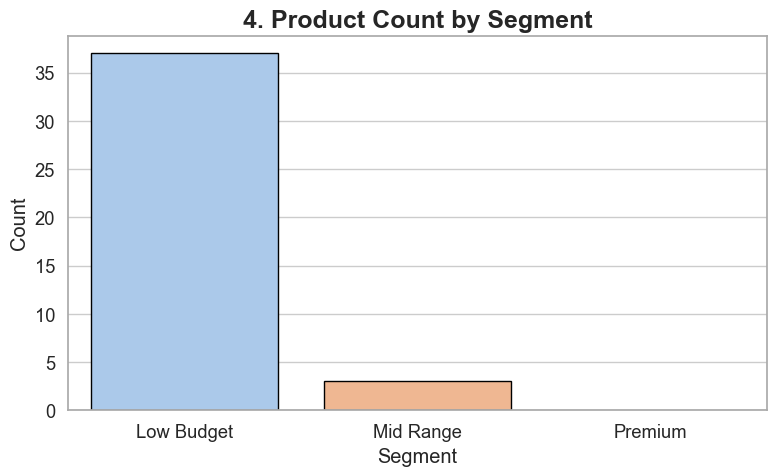

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12028\3257654309.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


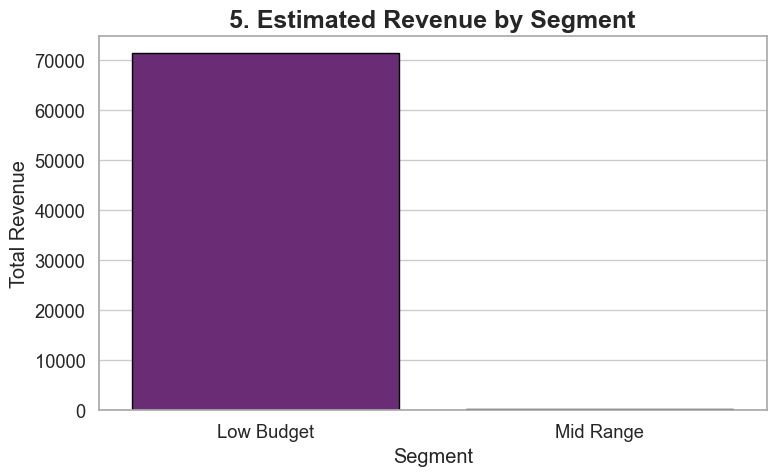

In [52]:
# --- STEP 2 (Beautiful Upgraded Version)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font_scale=1.2)

# Common figure style
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.edgecolor'] = "#aaaaaa"
plt.rcParams['axes.titleweight'] = "bold"

# -------------------------
# 1. Price Distribution
# -------------------------
plt.figure()
sns.histplot(
    df['Price'],
    bins=25,
    kde=True,
    color="#4a90e2",
    edgecolor="white",
    alpha=0.85,
    linewidth=1
)
plt.title("1. Price Distribution", fontsize=18)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# -------------------------
# 2. Price vs Reviews
# -------------------------
plt.figure()
sns.scatterplot(
    x='Price',
    y='Reviews',
    data=df,
    s=120,
    alpha=0.65,
    color="#2ecc71",
    edgecolor="black",
    linewidth=0.5
)
sns.regplot(
    x='Price',
    y='Reviews',
    data=df,
    scatter=False,
    color="#34495e"
)
plt.title("2. Price vs Reviews Correlation", fontsize=18)
plt.xlabel("Price")
plt.ylabel("Reviews Count")
plt.tight_layout()
plt.show()

# Graph 3: Top 5 Most Reviewed Products
plt.figure(figsize=(10, 6))

# Get top 5 products by Review count
top_5 = df.nlargest(5, 'Reviews')

# Fix: Use 'Product Name' instead of 'Name'
sns.barplot(x='Reviews', y='Product Name', data=top_5, palette='viridis', hue='Product Name', legend=False)

plt.title('3. Top 5 Most Reviewed Products', fontsize=15)
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()

# -------------------------
# 4. Product Count by Price Segment
# -------------------------
plt.figure(figsize=(8, 5))
sns.countplot(
    x='Price_Segment',
    data=df,
    palette="pastel",
    order=['Low Budget', 'Mid Range', 'Premium'],
    edgecolor="black"
)
plt.title("4. Product Count by Segment", fontsize=18)
plt.xlabel("Segment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# -------------------------
# 5. Estimated Revenue by Segment
# -------------------------
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Price_Segment',
    y='Est_Revenue',
    data=df,
    estimator=sum,
    palette="magma",
    edgecolor="black",
    errorbar=None
)
plt.title("5. Estimated Revenue by Segment", fontsize=18)
plt.xlabel("Segment")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()
